## PROBLEM OF STUDY
### This week, you will be analyzing data for the Marketing team. GlobalShala has been running ad campaigns on Facebook for an event called Superhero U and the Marketing team needs your help identifying at least one campaign to recommend discontinuing in order to cut costs. At the end of the week, you will select one or more ad campaigns to recommend discontinuing based on your team’s analysis.

### OBJECTIVES:
#### 1. Understand the relationship between different ads campaigns
#### 2. Determining Most cost effective ad campaign among the ads campaigns
#### 3. To determine key performance indicators

# Importing Libraries

In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wr

# Loading the data

In [173]:
df = pd.read_excel("Marketing_Data.xlsx")
df.head()


,campaign ID,Campaign Name,Audience,Age,Geography,Reach,Impressions,Frequency,Clicks,Unique Clicks,Unique Link Clic,Click-Through R,Unique Click-Thr,Amount Spent in,Cost Per Click (C,Cost per Result (,@dropdown,@dropdown.1
0,Campaign 1,SHU_6 (Educato,Educators and P,25-34,Group 1 (Australi,11387,23283,2.044700,487,406,180,2.09,3.57,"$1,092.24",$2.24,$6.07,NaN,NaN
1,Campaign 1,SHU_6 (Educato,Educators and P,35-44,Group 1 (Australi,8761,15683,1.790092,484,376,154,3.09,4.29,$835.46,$1.73,$5.43,NaN,NaN
2,Campaign 1,SHU_6 (Educato,Educators and P,45-54,Group 1 (Australi,2867,6283,2.191489,198,145,65,3.15,5.06,$319.38,$1.61,$4.91,NaN,NaN
3,Campaign 1,SHU_6 (Educato,Educators and P,55-64,Group 1 (Australi,889,1890,2.125984,49,40,21,2.59,4.50,$86.25,$1.76,$4.11,NaN,NaN
4,Campaign 2,SHU3_ (Student,Students,18-24,Group 2 (Australi,29675,39161,1.319663,2593,1994,1095,6.62,6.72,"$1,193.94",$0.46,$1.09,NaN,NaN


## Viewing most part of the dataset

In [174]:
print(df.to_string())

    campaign ID    Campaign Name         Audience    Age          Geography  Reach  Impressions  Frequency  Clicks  Unique Clicks  Unique Link Clic  Click-Through R  Unique Click-Thr Amount Spent in Cost Per Click (C Cost per Result (  @dropdown  @dropdown.1
0    Campaign 1   SHU_6 (Educato  Educators and P  25-34  Group 1 (Australi  11387        23283   2.044700     487            406               180             2.09              3.57       $1,092.24             $2.24             $6.07        NaN          NaN
1    Campaign 1   SHU_6 (Educato  Educators and P  35-44  Group 1 (Australi   8761        15683   1.790092     484            376               154             3.09              4.29         $835.46             $1.73             $5.43        NaN          NaN
2    Campaign 1   SHU_6 (Educato  Educators and P  45-54  Group 1 (Australi   2867         6283   2.191489     198            145                65             3.15              5.06         $319.38             $1.61       

## Getting the information of the data

In [175]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   campaign ID        33 non-null     object 
 1   Campaign Name      33 non-null     object 
 2   Audience           33 non-null     object 
 3   Age                33 non-null     object 
 4   Geography          33 non-null     object 
 5   Reach              33 non-null     int64  
 6   Impressions        33 non-null     int64  
 7   Frequency          33 non-null     float64
 8   Clicks             33 non-null     int64  
 9   Unique Clicks      33 non-null     int64  
 10  Unique Link Clic   33 non-null     int64  
 11  Click-Through R    33 non-null     float64
 12  Unique Click-Thr   33 non-null     float64
 13  Amount Spent in    33 non-null     object 
 14  Cost Per Click (C  33 non-null     object 
 15  Cost per Result (  33 non-null     object 
 16  @dropdown          0 non-nul

## Changing columns

In [176]:
df.columns = [
    'campaign_id', 'campaign_name', 'audience', 'age', 'geography', 'reach',
    'impressions', 'frequency', 'clicks', 'unique_clicks', 'unique_link_clicks',
    'ctr', 'unique_ctr', 'amount_spent', 'cost_per_click', 'cost_per_result',
    'dropdown1', 'dropdown2'
]
df.head()

,campaign_id,campaign_name,audience,age,geography,reach,impressions,frequency,clicks,unique_clicks,unique_link_clicks,ctr,unique_ctr,amount_spent,cost_per_click,cost_per_result,dropdown1,dropdown2
0,Campaign 1,SHU_6 (Educato,Educators and P,25-34,Group 1 (Australi,11387,23283,2.044700,487,406,180,2.09,3.57,"$1,092.24",$2.24,$6.07,NaN,NaN
1,Campaign 1,SHU_6 (Educato,Educators and P,35-44,Group 1 (Australi,8761,15683,1.790092,484,376,154,3.09,4.29,$835.46,$1.73,$5.43,NaN,NaN
2,Campaign 1,SHU_6 (Educato,Educators and P,45-54,Group 1 (Australi,2867,6283,2.191489,198,145,65,3.15,5.06,$319.38,$1.61,$4.91,NaN,NaN
3,Campaign 1,SHU_6 (Educato,Educators and P,55-64,Group 1 (Australi,889,1890,2.125984,49,40,21,2.59,4.50,$86.25,$1.76,$4.11,NaN,NaN
4,Campaign 2,SHU3_ (Student,Students,18-24,Group 2 (Australi,29675,39161,1.319663,2593,1994,1095,6.62,6.72,"$1,193.94",$0.46,$1.09,NaN,NaN


#### Checking dublicates in the dataset

In [177]:
#print(df.duplicated())

## Converting currency fields to float

In [178]:
currency_cols = ['amount_spent', 'cost_per_click', 'cost_per_result']

for col in currency_cols:
    df[col] = df[col].replace('[^0-9.]', '', regex=True).astype(float)


### Dropping all columns whose value equal to 'NaN'

In [179]:
df.dropna(axis=1, how = 'all', inplace=True)
print(df.to_string())

    campaign_id    campaign_name         audience    age          geography  reach  impressions  frequency  clicks  unique_clicks  unique_link_clicks    ctr  unique_ctr  amount_spent  cost_per_click  cost_per_result
0    Campaign 1   SHU_6 (Educato  Educators and P  25-34  Group 1 (Australi  11387        23283   2.044700     487            406                 180   2.09        3.57       1092.24            2.24             6.07
1    Campaign 1   SHU_6 (Educato  Educators and P  35-44  Group 1 (Australi   8761        15683   1.790092     484            376                 154   3.09        4.29        835.46            1.73             5.43
2    Campaign 1   SHU_6 (Educato  Educators and P  45-54  Group 1 (Australi   2867         6283   2.191489     198            145                  65   3.15        5.06        319.38            1.61             4.91
3    Campaign 1   SHU_6 (Educato  Educators and P  55-64  Group 1 (Australi    889         1890   2.125984      49             40       

In [180]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   campaign_id         33 non-null     object 
 1   campaign_name       33 non-null     object 
 2   audience            33 non-null     object 
 3   age                 33 non-null     object 
 4   geography           33 non-null     object 
 5   reach               33 non-null     int64  
 6   impressions         33 non-null     int64  
 7   frequency           33 non-null     float64
 8   clicks              33 non-null     int64  
 9   unique_clicks       33 non-null     int64  
 10  unique_link_clicks  33 non-null     int64  
 11  ctr                 33 non-null     float64
 12  unique_ctr          33 non-null     float64
 13  amount_spent        33 non-null     float64
 14  cost_per_click      33 non-null     float64
 15  cost_per_result     33 non-null     float64
dtypes: float64

## Finding correlation in the dataset

In [181]:
print(df.corr(numeric_only=True))

                       reach  impressions  frequency    clicks  unique_clicks  \
reach               1.000000     0.954161   0.190143  0.895300       0.918396   
impressions         0.954161     1.000000   0.415266  0.830217       0.846363   
frequency           0.190143     0.415266   1.000000  0.110370       0.103685   
clicks              0.895300     0.830217   0.110370  1.000000       0.997378   
unique_clicks       0.918396     0.846363   0.103685  0.997378       1.000000   
unique_link_clicks  0.940743     0.837661   0.056021  0.962116       0.974685   
ctr                -0.083845    -0.183359  -0.437479  0.173884       0.155438   
unique_ctr         -0.034556    -0.083864  -0.200013  0.218590       0.197706   
amount_spent        0.734962     0.706480   0.104292  0.654750       0.675300   
cost_per_click     -0.510547    -0.551133  -0.464787 -0.516185      -0.514501   
cost_per_result    -0.448289    -0.476624  -0.401623 -0.450283      -0.450287   

                    unique_

## Scatter plot on the Relationship between Reach and Clicks

[]

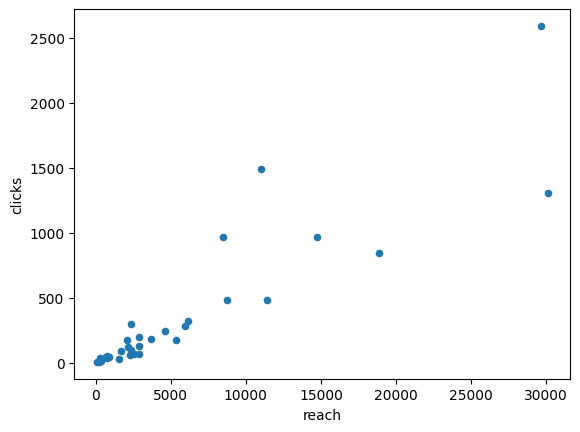

In [182]:
df.plot(kind='scatter', x= 'reach', y= 'clicks')
plt.plot()

### Histogram